<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/05-K-Nearest-Neighbors/01_KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN -  K Nearest Neighbors - Classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('gdrive/My Drive/csv_files/gene_expression.csv')

In [5]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


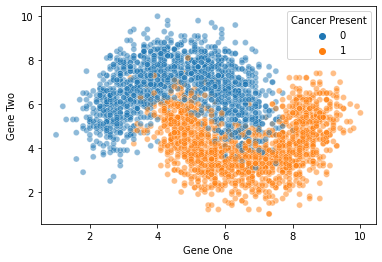

In [9]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',
                hue='Cancer Present',alpha=0.5);

In [8]:
len(df)

3000

(4.0, 8.0)

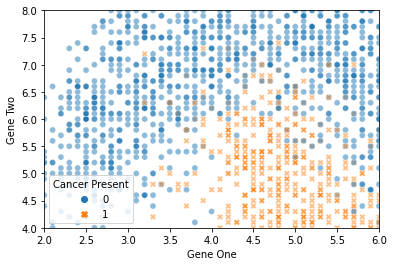

In [11]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',
                hue='Cancer Present',alpha=0.5,style='Cancer Present');
plt.xlim(2,6)
plt.ylim(4,8)

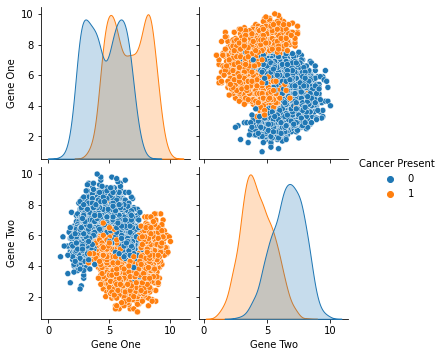

In [13]:
sns.pairplot(data=df,hue='Cancer Present');

In [14]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

## Train|Test Split and Scaling Data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
help(KNeighborsClassifier)

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
y_pred = knn_model.predict(scaled_X_test)

In [26]:
confusion_matrix(y_test,y_pred)

array([[422,  48],
       [ 50, 380]])

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.89      0.88      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.8911111111111111

## Elbow Method for Choosing Reasonable K Values

**NOTE: This uses the test set for the hyperparameter selection of K.**

In [30]:
test_error_rates = []

for k in range (1,30):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(scaled_X_train, y_train)

  y_pred_test = knn_model.predict(scaled_X_test)

  test_error = 1 - accuracy_score(y_test,y_pred_test)
  test_error_rates.append(test_error)

In [31]:
test_error_rates

[0.10888888888888892,
 0.09999999999999998,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06666666666666665,
 0.06444444444444442,
 0.06444444444444442,
 0.05777777777777782,
 0.06333333333333335,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05666666666666664,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0.5, 0, 'K Neighbors')

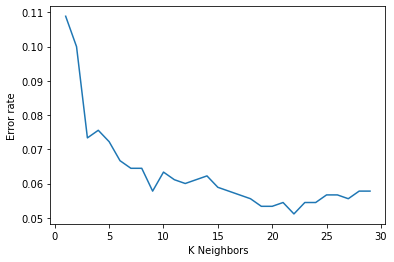

In [32]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error rate')
plt.xlabel('K Neighbors')

## Full Cross Validation Grid Search for K Value

### Creating a Pipeline to find K value

**Follow along very carefully here! We use very specific string codes AND variable names here so that everything matches up correctly. This is not a case where you can easily swap out variable names for whatever you want!**

We'll use a Pipeline object to set up a workflow of operations:

1. Scale Data
2. Create Model on Scaled Data

----
*How does the Scaler work inside a Pipeline with CV? Is scikit-learn "smart" enough to understand .fit() on train vs .transform() on train and test?**

**Yes! Scikit-Learn's pipeline is well suited for this! [Full Info in Documentation](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) **

When you use the StandardScaler as a step inside a Pipeline then scikit-learn will internally do the job for you.

What happens can be discribed as follows:

* Step 0: The data are split into TRAINING data and TEST data according to the cv parameter that you specified in the GridSearchCV.
* Step 1: the scaler is fitted on the TRAINING data
* Step 2: the scaler transforms TRAINING data
* Step 3: the models are fitted/trained using the transformed TRAINING data
* Step 4: the scaler is used to transform the TEST data
* Step 5: the trained models predict using the transformed TEST data

----

In [33]:
#PIPELINE --> GridSearch CV

In [34]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [36]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [37]:
operations = [('scaler',scaler),('knn',knn)]

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipe = Pipeline(operations)

In [40]:
from sklearn.model_selection import GridSearchCV

---
*Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:**

* chosen_string_name + **two** underscores + parameter key name
* model_name + __ + parameter name
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[StackOverflow on this](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline)

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler).

---

In [41]:
k_values = list(range(1,20))

In [42]:
param_grid = {'knn__n_neighbors':k_values}

In [43]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,
                                  scoring='accuracy')

In [45]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [46]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [48]:
full_pred = full_cv_classifier.predict(X_test)

In [49]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [50]:
new_patient = [[3.8,6.4]]

In [51]:
full_cv_classifier.predict(new_patient)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [52]:
full_cv_classifier.predict_proba(new_patient)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[1., 0.]])